In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.


In [5]:
numericals = data.select_dtypes(np.number)


In [6]:
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

In [7]:
continuous, discrete = to_dict(numericals)


In [8]:
discrete_df = pd.DataFrame.from_dict(discrete)

In [9]:
discrete_df.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [10]:
len(discrete_df.Income.unique())

5694

In [11]:
continuous_df= pd.DataFrame.from_dict(continuous)

In [12]:
continuous_df.head()

,Customer Lifetime Value,Total Claim Amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


In [13]:
#Plot a correlation matrix, what can you see?


In [14]:
num = data.select_dtypes(include = np.number)


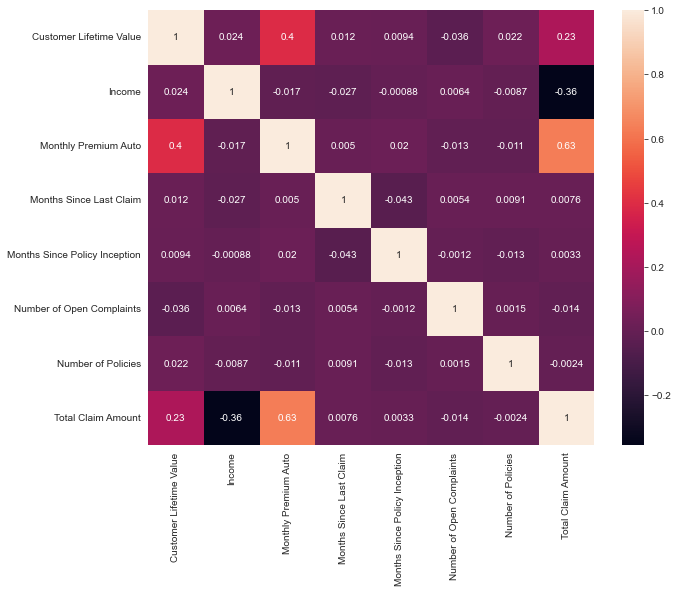

In [15]:
corr_matrix=num.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
#Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).


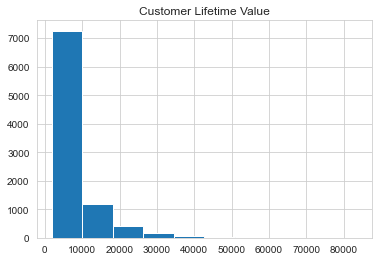

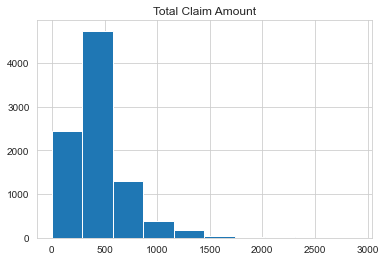

In [17]:
for column in continuous_df:
    continuous_df[column].hist()
    plt.title(column)
    plt.show()

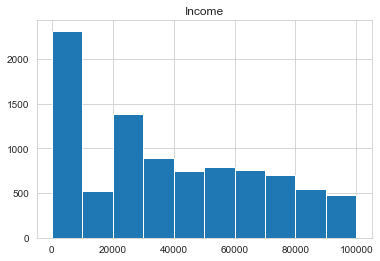

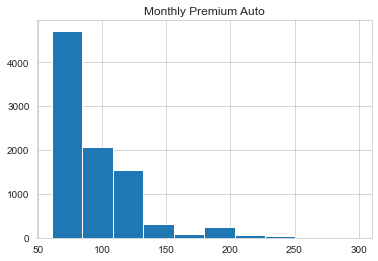

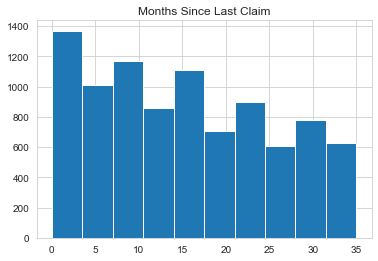

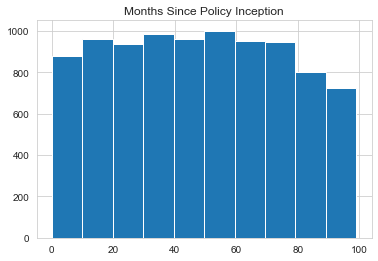

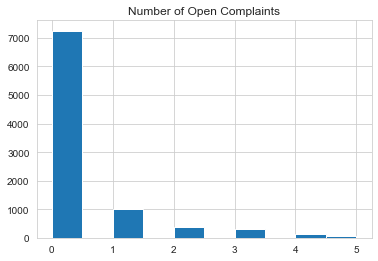

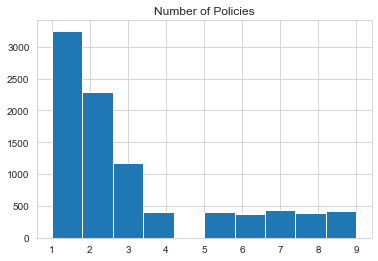

In [18]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

In [19]:
#Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


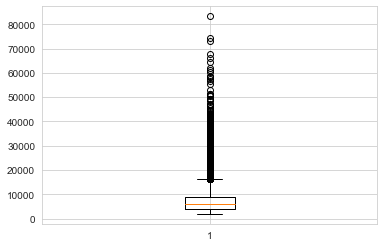

<Figure size 7200x50400 with 0 Axes>

In [20]:
plt.boxplot(continuous_df['Customer Lifetime Value'])
fig = plt.figure(figsize =(100, 700))
plt.show()

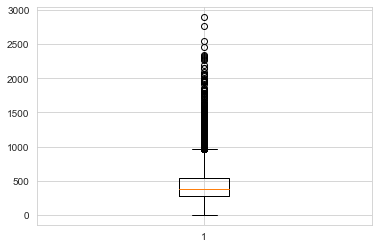

<Figure size 720x504 with 0 Axes>

In [21]:
plt.boxplot(continuous_df['Total Claim Amount'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [22]:
cat = data.select_dtypes(include = np.object)


In [23]:
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
#Plot all the categorical variables with the proper plot. What can you see?


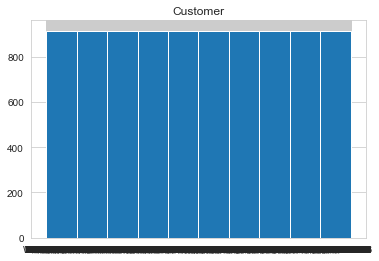

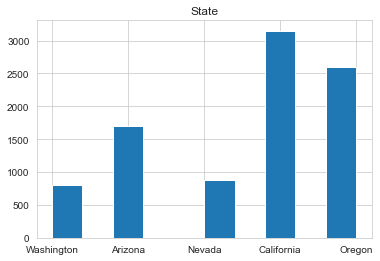

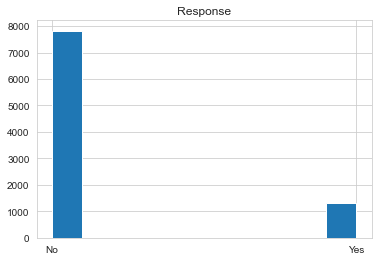

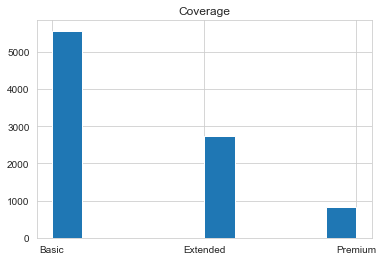

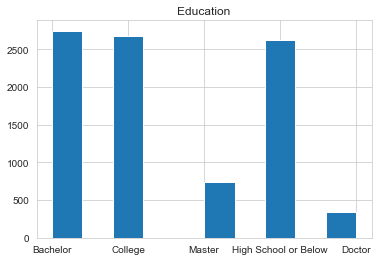

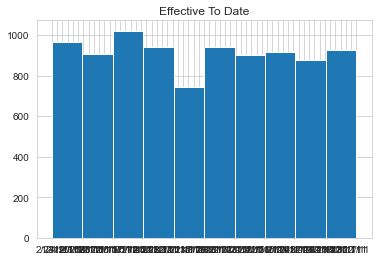

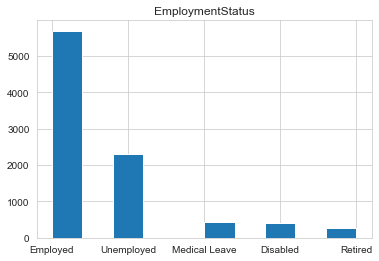

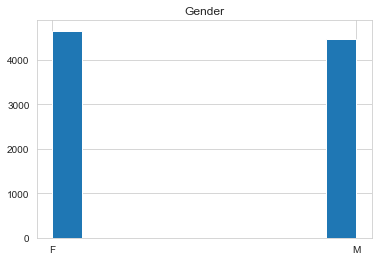

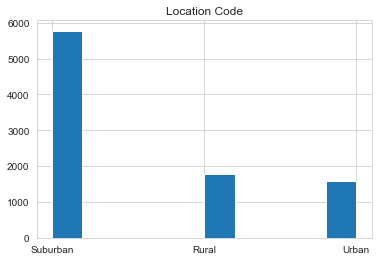

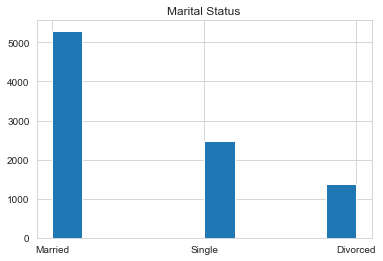

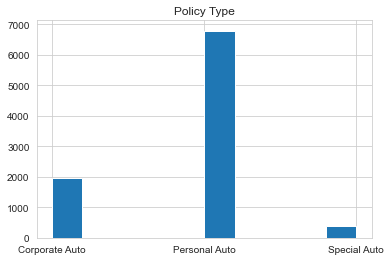

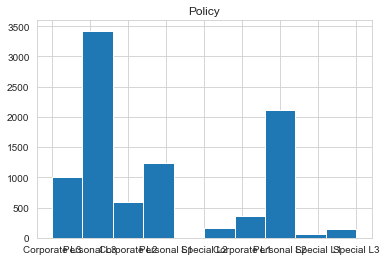

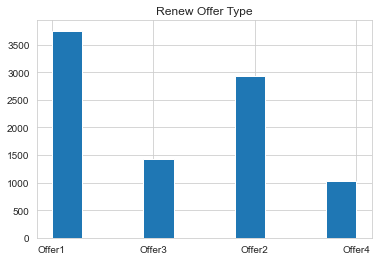

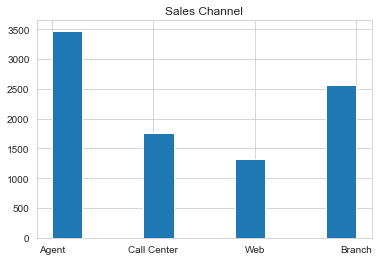

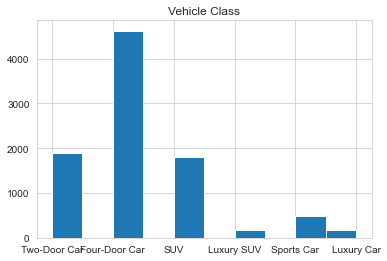

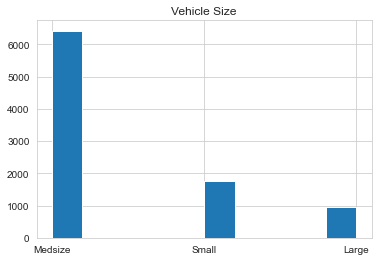

In [25]:
for col in cat:
    cat[col].hist()
    plt.title(col)
    plt.show()

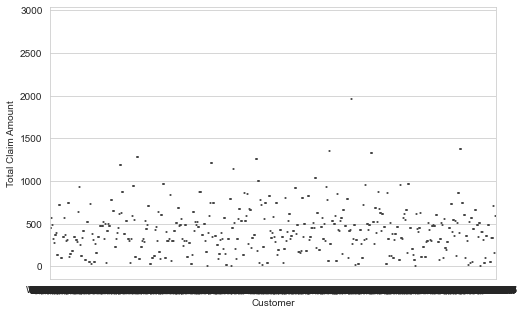

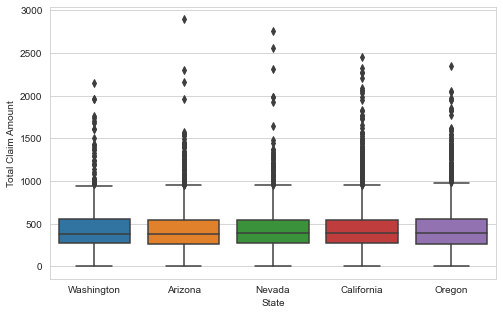

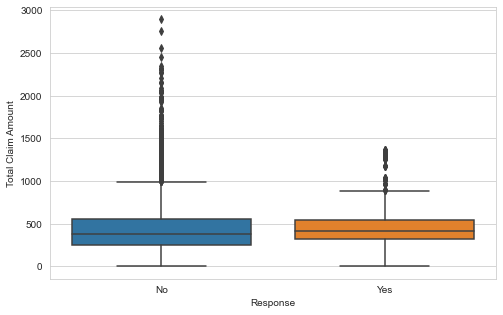

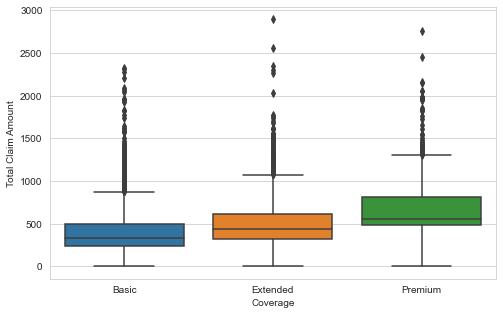

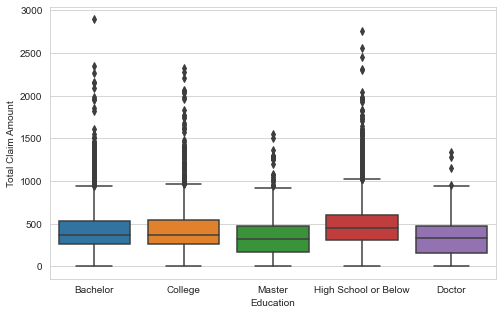

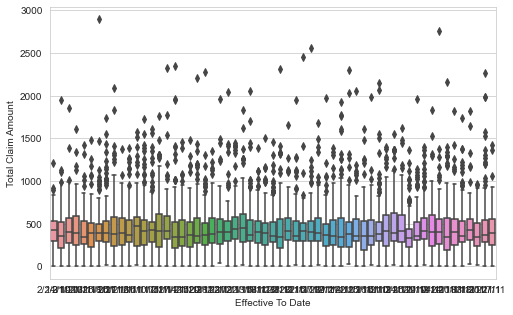

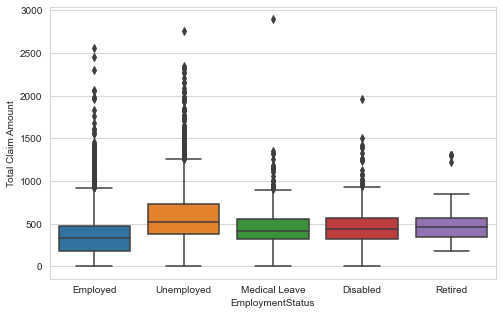

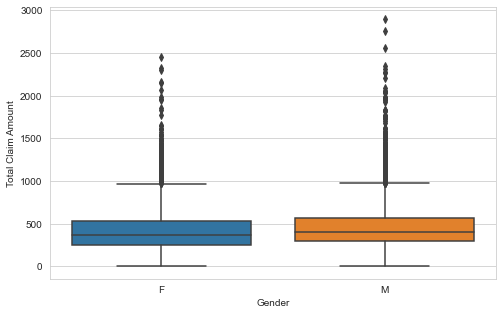

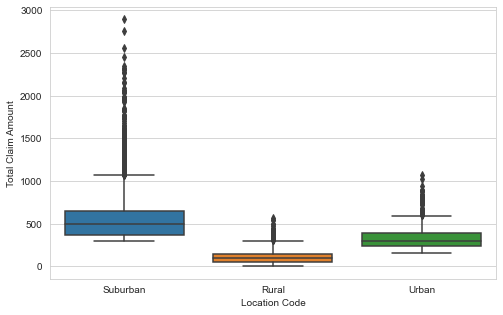

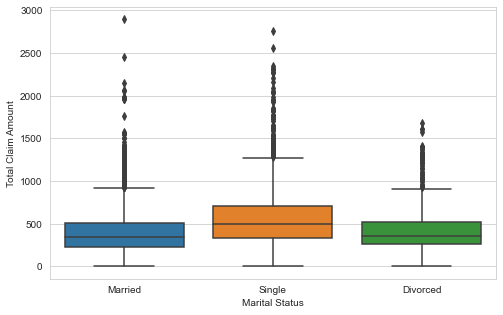

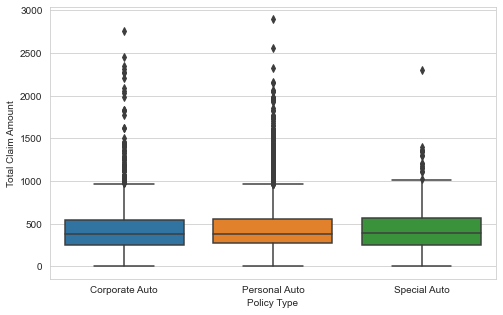

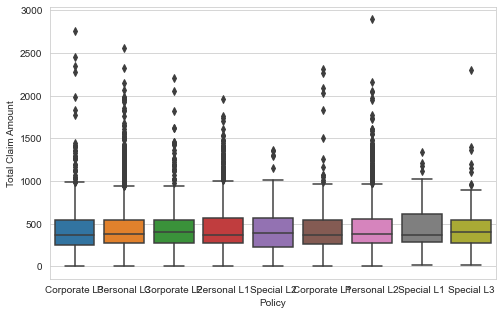

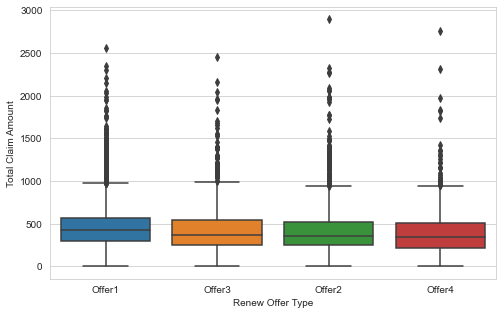

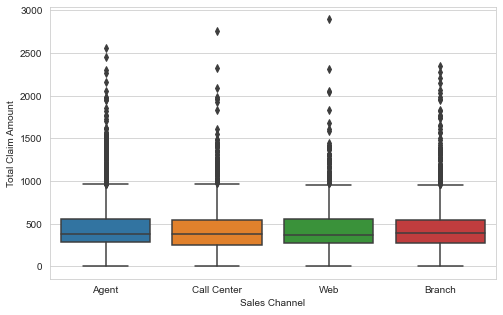

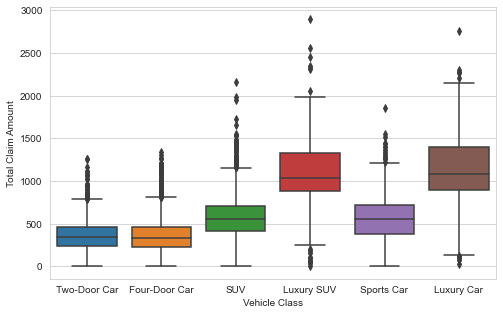

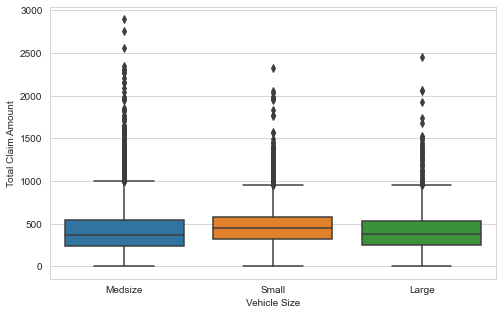

In [30]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=cat[col], y=data['Total Claim Amount'])
    plt.show()


In [ ]:
# gender is not relevant 
#Policy type is contained in policy

In [ ]:
#There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [32]:
cat = cat.drop(['Gender','Policy Type'], axis=1)
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


<AxesSubplot:xlabel='Effective To Date', ylabel='Total Claim Amount'>

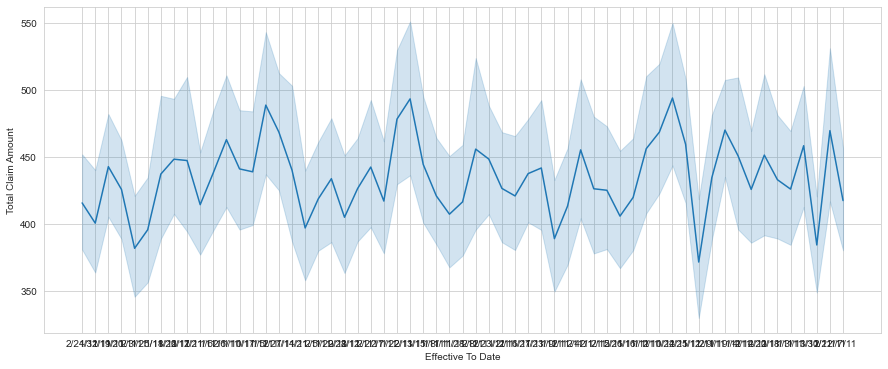

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data['Effective To Date'], data['Total Claim Amount'] )